In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\\kats1\\OneDrive\\Documents\\GitHub\\PopularGameGenrePy\\ign.csv', header=0, index_col=0)
#df.set_index('ID')
# df.index.name = 'ID'
# df.describe()
# df.head()
df.index+=1
df.drop(['url','release_month','release_day','title','score_phrase'], axis=1,inplace=True)

df.dtypes

platform           object
score             float64
genre              object
editors_choice     object
release_year        int64
dtype: object

In [4]:
df.head(50)
sort_by_year = df.sort_values(['release_year','platform','genre'])

#sort_by_year = pd.DataFrame(sort_by_year)
type(sort_by_year)

pandas.core.frame.DataFrame

In [5]:
sort_by_year.head()

,platform,score,genre,editors_choice,release_year
517,Xbox 360,8.5,Adventure,N,1970
589,Nintendo 64,6.5,Action,N,1996
484,Nintendo 64,4.1,Fighting,N,1996
591,Nintendo 64,6.5,Fighting,N,1996
489,Nintendo 64,8.2,Flight,N,1996


In [6]:
sort_by_year.score = sort_by_year.score.astype(int)
sort_by_year.tail(10)

,platform,score,genre,editors_choice,release_year
18572,Xbox One,9,Shooter,Y,2016
18603,Xbox One,7,Shooter,N,2016
18612,Xbox One,5,Shooter,N,2016
18598,Xbox One,4,"Shooter, Adventure",N,2016
18387,Xbox One,8,Sports,N,2016
18453,Xbox One,8,Sports,N,2016
18465,Xbox One,9,Sports,Y,2016
18469,Xbox One,8,Sports,N,2016
18608,iPhone,7,Battle,N,2016
18420,iPhone,5,RPG,N,2016


genre_score_year = sort_by_year[['genre','score','release_year']]
genre_score_year = pd.DataFrame(genre_score_year)
genre_score_year.head()

In [7]:
sort_by_year.drop('editors_choice',axis=1,inplace=True)

In [8]:
#sort_by_year.drop(sort_by_year.index[0],inplace=True)
sort_by_year.reset_index(drop = True).tail(10)


,platform,score,genre,release_year
18615,Xbox One,9,Shooter,2016
18616,Xbox One,7,Shooter,2016
18617,Xbox One,5,Shooter,2016
18618,Xbox One,4,"Shooter, Adventure",2016
18619,Xbox One,8,Sports,2016
18620,Xbox One,8,Sports,2016
18621,Xbox One,9,Sports,2016
18622,Xbox One,8,Sports,2016
18623,iPhone,7,Battle,2016
18624,iPhone,5,RPG,2016


In [9]:
sort_by_year.drop(sort_by_year.index[0],axis=0,inplace=True)

In [10]:
sort_by_year.isnull().any()
sort_by_year.describe()


,score,release_year
count,18624.000000,18624.000000
mean,6.627685,2006.517290
std,1.702303,4.579841
min,0.000000,1996.000000
25%,6.000000,2003.000000
50%,7.000000,2007.000000
75%,8.000000,2010.000000
max,10.000000,2016.000000


In [11]:
sort_by_year.dropna(inplace=True)
sort_by_year.describe()

,score,release_year
count,18588.000000,18588.000000
mean,6.627771,2006.510598
std,1.702611,4.580990
min,0.000000,1996.000000
25%,6.000000,2003.000000
50%,7.000000,2007.000000
75%,8.000000,2010.000000
max,10.000000,2016.000000


In [12]:
list_genre = sort_by_year['genre'].unique().tolist()

In [13]:
print(len(list_genre))
print(list_genre)

112
['Action', 'Fighting', 'Flight', 'Platformer', 'Racing', 'Sports', 'Action, Adventure', 'Action, Compilation', 'Adventure', 'Compilation', 'Flight, Action', 'Puzzle', 'RPG', 'Racing, Action', 'Shooter', 'Simulation', 'Strategy', 'Wrestling', 'Action, RPG', 'Casino', 'Fighting, Compilation', 'Hunting', 'Music', 'Pinball', 'Puzzle, Action', 'Sports, Action', 'Battle', 'Board', 'Sports, Racing', 'Action, Simulation', 'Flight, Simulation', 'Sports, Simulation', 'Trivia', 'Music, Action', 'Strategy, RPG', 'Fighting, Action', 'Other', 'Party', 'Action, Platformer', 'Puzzle, Adventure', 'Educational, Puzzle', 'Productivity', 'Virtual Pet', 'Racing, Simulation', 'Card, Battle', 'Sports, Editor', 'Music, Editor', 'RPG, Editor', 'Educational, Action', 'Card', 'Card, RPG', 'Fighting, Adventure', 'Wrestling, Simulation', 'RPG, Compilation', 'RPG, Simulation', 'Flight, Racing', 'Sports, Compilation', 'Shooter, Platformer', 'Hunting, Simulation', 'Fighting, RPG', 'Pinball, Compilation', 'Card, C

In [60]:
replace_genre = {'Action':'Action', 'Action, Adventure':'Action', 'Action, Compilation':'Action', 'Action, Platformer':'Action', 'Action, RPG':'RPG',
                 'Action, Simulation':'Simulation', 'Adventure':'Adventure','Battle':'Action', 'Board':'Strategy', 'Card':'Strategy', 'Card, Battle':'Strategy', 
                 'Card, RPG':'RPG', 'Casino':'Others', 'Compilation':'Others', 'Educational, Action':'Others','Educational, Puzzle':'Strategy',
                 'Fighting':'Action', 'Fighting, Action':'Action', 'Fighting, Adventure':'Adventure', 'Fighting, Compilation':'Action', 'Flight':'Adventure',
                 'Flight,Action':'Action', 'Flight, Racing':'Sports', 'Flight, Simulation':'Simulation', 'Hunting':'Sports', 'Music':'Other', 'Music, Action':'Action',
                 'Music, Editor':'Simulation', 'Other':'Other', 'Party':'Other', 'Pinball':'Sports', 'Platformer':'Other', 'Productivity':'Other', 'Puzzle':'Strategy',
                 'Puzzle, Action':'Strategy', 'Puzzle, Adventure':'Strategy', 'RPG':'RPG', 'RPG, Compilation':'RPG', 'RPG, Editor':'RPG', 'RPG, Simulation':'RPG', 'Racing':'Sports',
                 'Racing, Action':'Action', 'Racing, Simulation':'Simulation', 'Shooter':'Sports', 'Simulation':'Simulation', 'Sports':'Sports', 'Sports, Action':'Action',
                 'Sports, Compilation':'Sports', 'Sports, Editor':'Sports', 'Sports, Racing':'Sports', 'Sports, Simulation':'Simulation', 'Strategy':'Strategy', 'Strategy, RPG':'RPG', 
                 'Trivia':'Other', 'Virtual Pet':'Simulation', 'Wrestling':'Sports', 'Wrestling, Simulation':'Simulation', 'Action, Editor':'Action', 'Adult, Card':'Other',
                 'Board, Compilation':'Other', 'Card, Compilation':'Other', 'Compilation, Compilation':'Other', 'Educational':'Other', 'Educational, Productivity':'Other',
                 'Educational, Simulation':'Other', 'Educational, Trivia':'Strategy', 'Fighting, RPG':'RPG', 'Hunting, Action':'Action', 'Hunting, Simulation':'Simulation',
                 'Other, Action':'Action', 'Pinball, Compilation':'Other', 'Platformer, Action':'Action', 'Puzzle, Compilation':'Strategy', 'Racing, Compilation':'Sports',
                 'Racing, Editor':'Sports', 'Racing, Shooter':'Action', 'Shooter, Platformer':'Action', 'Puzzle, Word Game':'Other', 'Adventure, Compilation':'Action',
                 'Educational, Card':'Other', 'Educational, Adventure':'Other', 'Strategy, Compilation':'Strategy', 'Music, Compilation':'Other', 'Fighting, Simulation':'Simulation',
                 'Platformer, Adventure':'Simulation', 'Shooter, RPG':'RPG', 'Other, Adventure':'Other', 'Simulation, Adventure':'Simulation', 'Adventure, Episodic':'Simulation',
                 'Adventure, Adult':'Simulation', 'Adventure, Platformer':'Simulation', 'Action, Puzzle':'Other', 'Sports, Fighting':'Sports', 'Puzzle, RPG':'RPG', 'Music, RPG':'RPG',
                 'Adventure, Adventure':'Action', 'Adventure, RPG':'RPG', 'Productivity, Action':'Action', 'RPG, Action':'RPG', 'Shooter, First-Person':'Action',
                 'Baseball':'Sports', 'Compilation, RPG':'RPG', 'Sports, Baseball':'Sports', 'Sports, Other':'Sports', 'Sports, Party':'Sports', 'Puzzle, Platformer':'Other',
                 'Action, Strategy':'Strategy', 'Music, Adventure':'Other', 'Strategy, Simulation':'Strategy', 'Sports, Golf':'Sports', 'Hardware':'Other', 'Shooter, Adventure':'Action'}                                                                                          

genres = sort_by_year.genre.map(replace_genre)    

In [61]:
df = pd.DataFrame(genres)

In [62]:
df.head()

,genre
0,Action
1,Action
2,Action
3,Adventure
4,Other


In [63]:
sort_by_year['genre'] = df['genre']

In [64]:
sort_by_year.reset_index(inplace=True)

In [65]:
#sort_by_year.drop(['index'], axis=1, inplace=True)

In [66]:
sort_by_year.describe()

,level_0,index,score,release_year
count,18588.000000,18588.000000,18588.000000,18588.000000
mean,9293.500000,9293.500000,6.627771,2006.510598
std,5366.037737,5366.037737,1.702611,4.580990
min,0.000000,0.000000,0.000000,1996.000000
25%,4646.750000,4646.750000,6.000000,2003.000000
50%,9293.500000,9293.500000,7.000000,2007.000000
75%,13940.250000,13940.250000,8.000000,2010.000000
max,18587.000000,18587.000000,10.000000,2016.000000


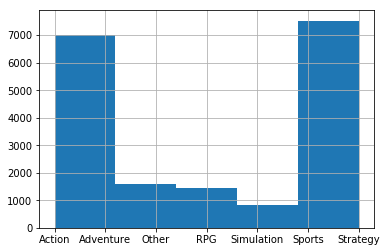

In [67]:
sort_by_year['genre'].hist(bins=5)

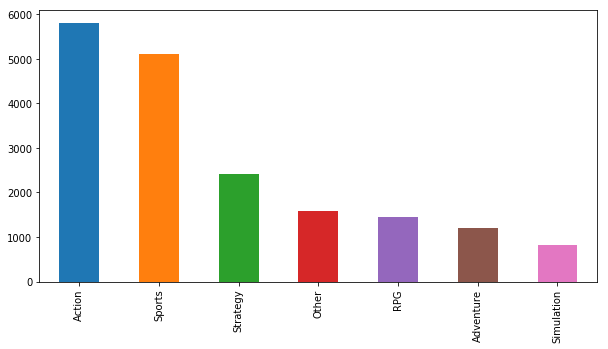

In [68]:
sort_by_year.genre.value_counts().plot(kind='bar', figsize=(10,5))

In [20]:
grp_by = sort_by_year.groupby (['release_year','genre','score'])

In [71]:
grp_by.

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [22]:
count_score = grp_by.size().reset_index()

In [34]:
sort_by_year.head(10)

,platform,score,genre,release_year
0,Nintendo 64,6,Action,1996
1,Nintendo 64,4,Action,1996
2,Nintendo 64,6,Action,1996
3,Nintendo 64,8,Adventure,1996
4,Nintendo 64,9,Other,1996
5,Nintendo 64,9,Sports,1996
6,Nintendo 64,4,Sports,1996
7,Nintendo 64,7,Sports,1996
8,PC,6,Sports,1996
9,PlayStation,3,Action,1996


In [31]:
sort_by_year.genre.count()

18463

In [36]:
genre = sort_by_year[sort_by_year.genre == 'Action']

In [38]:
genre.count()

platform        5811
score           5811
genre           5811
release_year    5811
dtype: int64